# Определение перспективного тарифа для телеком-компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». 
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Цель исследования** - проверить две гипотезы:<br>  
•	средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;<br>
•	средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.<br> 
<br> 
**Описание тарифов**<br>
<br>
**Тариф «Смарт»**<br>
1.	Ежемесячная плата: 550 рублей<br>
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика<br>
3.	Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.<br>
**Тариф «Ультра»**
1.	Ежемесячная плата: 1950 рублей<br>
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика<br>
3.	Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.<br>
**Примечание:** <br>
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.<br>
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.


**Описание данных**

**Таблица calls** (информация о звонках):<br>
<br>
•	`id` — уникальный номер звонка<br>
•	`call_date` — дата звонка<br>
•	`duration` — длительность звонка в минутах<br>
•	`user_id` — идентификатор пользователя, сделавшего звонок<br>
<br>
**Таблица internet** (информация об интернет-сессиях):<br>
<br>
•	`id` — уникальный номер сессии<br>
•	`mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)<br>
•	`session_date` — дата интернет-сессии<br>
•	`user_id` — идентификатор пользователя<br>
<br>
**Таблица messages** (информация о сообщениях):<br>
<br>
•	`id` — уникальный номер сообщения<br>
•	`message_date` — дата сообщения<br>
•	`user_id` — идентификатор пользователя, отправившего сообщение<br>
<br>
**Таблица tariffs**(информация о тарифах):<br>
<br>
•	`tariff_name` — название тарифа<br>
•	`rub_monthly_fee` — ежемесячная абонентская плата в рублях<br>
•	`minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату<br>
•	`messages_included` — количество сообщений в месяц, включённых в абонентскую плату<br>
•	`mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)<br>
•	`rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)<br>
•	`rub_per_message` — стоимость отправки сообщения сверх тарифного пакета<br>
•	`rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта) <br> 
<br> 
**Таблица users**(информация о пользователях):<br>
<br>
•	`user_id` — уникальный идентификатор пользователя<br>
•	`first_name` — имя пользователя<br>
•	`last_name` — фамилия пользователя<br>
•	`age` — возраст пользователя (годы)<br>
•	`reg_date` — дата подключения тарифа (день, месяц, год)<br>
•	`churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)<br>
•	`city` — город проживания пользователя<br>
•	`tarif` — название тарифного плана<br>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Изучение-данных-из-файла" data-toc-modified-id="1.-Изучение-данных-из-файла-1">1. Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#1.1-Вывод" data-toc-modified-id="1.1-Вывод-1.1">1.1 Вывод</a></span></li></ul></li><li><span><a href="#2.-Предобработка-данных" data-toc-modified-id="2.-Предобработка-данных-2">2. Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#2.1-Изменение-типов-данных-в-столбцах-с-датой-на-тип--to_datetime" data-toc-modified-id="2.1-Изменение-типов-данных-в-столбцах-с-датой-на-тип--to_datetime-2.1">2.1 Изменение типов данных в столбцах с датой на тип  <code>to_datetime</code></a></span></li><li><span><a href="#2.2-Округление-значений" data-toc-modified-id="2.2-Округление-значений-2.2">2.2 Округление значений</a></span></li><li><span><a href="#2.3-Объединение-таблиц" data-toc-modified-id="2.3-Объединение-таблиц-2.3">2.3 Объединение таблиц</a></span></li><li><span><a href="#2.4-Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="2.4-Расчёты-и-добавление-результатов-в-таблицу-2.4">2.4 Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#2.4.1-Подсчет-количества-сделанных-звонков-и-израсходованных-минут-разговора-по-месяцам" data-toc-modified-id="2.4.1-Подсчет-количества-сделанных-звонков-и-израсходованных-минут-разговора-по-месяцам-2.5">2.4.1 Подсчет количества сделанных звонков и израсходованных минут разговора по месяцам</a></span></li><li><span><a href="#2.4.2-Подсчет-количества-отправленных-сообщений-по-месяцам" data-toc-modified-id="2.4.2-Подсчет-количества-отправленных-сообщений-по-месяцам-2.6">2.4.2 Подсчет количества отправленных сообщений по месяцам</a></span></li><li><span><a href="#2.4.3-Подсчет-объема-израсходованного-интернет-трафика-по-месяцам" data-toc-modified-id="2.4.3-Подсчет-объема-израсходованного-интернет-трафика-по-месяцам-2.7">2.4.3 Подсчет объема израсходованного интернет-трафика по месяцам</a></span></li><li><span><a href="#2.4.4-Посчитаем-для-каждого-пользователя-помесячную-выручку-с-каждого-пользователя" data-toc-modified-id="2.4.4-Посчитаем-для-каждого-пользователя-помесячную-выручку-с-каждого-пользователя-2.8">2.4.4 Посчитаем для каждого пользователя помесячную выручку с каждого пользователя</a></span></li><li><span><a href="#2.5-Вывод" data-toc-modified-id="2.5-Вывод-2.9">2.5 Вывод</a></span></li></ul></li><li><span><a href="#3.-Анализ-данных" data-toc-modified-id="3.-Анализ-данных-3">3. Анализ данных</a></span><ul class="toc-item"><li><span><a href="#3.1-Расчет-среднего-количества,-дисперсии-и-стандартного-отклонения" data-toc-modified-id="3.1-Расчет-среднего-количества,-дисперсии-и-стандартного-отклонения-3.1">3.1 Расчет среднего количества, дисперсии и стандартного отклонения</a></span></li><li><span><a href="#3.2-Вывод" data-toc-modified-id="3.2-Вывод-3.2">3.2 Вывод</a></span></li></ul></li><li><span><a href="#4.-Проверка-гипотез" data-toc-modified-id="4.-Проверка-гипотез-4">4. Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#4.1-Гипотеза-№1:-Средняя-выручка-от-пользователей-тарифов-&quot;Ультра&quot;-и-&quot;Смарт&quot;-различается." data-toc-modified-id="4.1-Гипотеза-№1:-Средняя-выручка-от-пользователей-тарифов-&quot;Ультра&quot;-и-&quot;Смарт&quot;-различается.-4.1">4.1 Гипотеза №1: Средняя выручка от пользователей тарифов "Ультра" и "Смарт" различается.</a></span></li><li><span><a href="#4.2-Гипотеза-№2:-Средняя-выручка-от-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов." data-toc-modified-id="4.2-Гипотеза-№2:-Средняя-выручка-от-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов.-4.2">4.2 Гипотеза №2: Средняя выручка от пользователей из Москвы отличается от выручки пользователей из других регионов.</a></span></li><li><span><a href="#4.3-Вывод" data-toc-modified-id="4.3-Вывод-4.3">4.3 Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5">Общий вывод</a></span></li></ul></div>

## 1. Изучение данных из файла

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np 
from scipy import stats as st
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Прочитаем файлы с данными

In [2]:
calls = pd.read_csv('./datasets/calls.csv', sep = ',')
internet = pd.read_csv('./datasets/internet.csv', sep = ',')
messages = pd.read_csv('./datasets/messages.csv', sep = ',')
tariffs = pd.read_csv('./datasets/tariffs.csv', sep = ',')
users = pd.read_csv('./datasets/users.csv', sep = ',')

Посмотрим общую информацию о каждом датасете, проверим их на пропуски и дубликаты. 

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [6]:
calls.duplicated().sum()

0

In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


Удалим столбец `Unnamed: 0`

In [9]:
internet.drop(columns = 'Unnamed: 0', inplace = True)

In [10]:
internet.isna().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [11]:
internet.duplicated().sum()

0

In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [14]:
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [15]:
messages.duplicated().sum()

0

In [16]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [17]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [19]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [20]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [21]:
users.duplicated().sum()

0

### 1.1 Вывод

При изучении данных найдены  пропуски  только в датасете `users` по столбцу `churn_date`, но они присутствуют потому что данный пользователь до сих пор является клиентом. Дубликаты  в датасетах отсутствуют.  Необходимо преобразование типов данных в формат `Datetime`. Удалили столбец `Unnamed: 0` в датасете `internet`.

## 2. Предобработка данных

### 2.1 Изменение типов данных в столбцах с датой на тип  `to_datetime`

In [22]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

In [23]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

In [24]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

In [25]:
users['churn_date'].fillna('2018-12-31', inplace=True)
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

Проверка изменений

In [26]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [27]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  500 non-null    datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### 2.2 Округление значений

Округление значений длительности звонка до  целочисленного значения в сторону увеличения

In [28]:
calls['duration'] = calls['duration'].apply(math.ceil)
calls['duration'].head()

0     0
1     0
2     3
3    14
4     6
Name: duration, dtype: int64

Добавим столбец с израсходованными Gb

In [29]:
tariffs ['gb_per_month_included'] = (tariffs['mb_per_month_included']/1024).astype('int')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


### 2.3 Объединение таблиц

Переименуем столбец `tariff_name` в `tariff_name`

In [30]:
tariffs = tariffs.rename(columns = {'tariff_name':'tariff'})
tariffs.head(2)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


Объединим датасеты `users` и `tariffs` и посмотрим на него

In [31]:
users_tariff = users.merge(tariffs, on = 'tariff', how = 'outer')

In [32]:
users_tariff

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30
1,1003,23,2018-12-31,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,30
2,1004,68,2018-12-31,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1,30
3,1013,36,2018-12-31,Иваново,Борис,Андреенко,2018-11-14,ultra,1000,30720,3000,1950,150,1,1,30
4,1016,58,2018-12-31,Омск,Марица,Сазонова,2018-11-21,ultra,1000,30720,3000,1950,150,1,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1494,62,2018-12-31,Омск,Ренат,Андропов,2018-08-17,smart,50,15360,500,550,200,3,3,15
496,1496,36,2018-12-31,Вологда,Трифон,Блохин,2018-01-27,smart,50,15360,500,550,200,3,3,15
497,1497,32,2018-12-31,Челябинск,Каролина,Агеева,2018-10-09,smart,50,15360,500,550,200,3,3,15
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3,15


Объединим датасеты `calls` и `users_tariff`  и посмотрим на него

In [33]:
users_calls = users_tariff.merge(calls, on ='user_id', how = 'inner')

In [34]:
users_calls.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,id,call_date,duration
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30,1000_0,2018-07-25,0
1,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30,1000_1,2018-08-17,0
2,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30,1000_2,2018-06-11,3
3,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30,1000_3,2018-09-21,14
4,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30,1000_4,2018-12-15,6


In [35]:
users_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202607 entries, 0 to 202606
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                202607 non-null  int64         
 1   age                    202607 non-null  int64         
 2   churn_date             202607 non-null  datetime64[ns]
 3   city                   202607 non-null  object        
 4   first_name             202607 non-null  object        
 5   last_name              202607 non-null  object        
 6   reg_date               202607 non-null  datetime64[ns]
 7   tariff                 202607 non-null  object        
 8   messages_included      202607 non-null  int64         
 9   mb_per_month_included  202607 non-null  int64         
 10  minutes_included       202607 non-null  int64         
 11  rub_monthly_fee        202607 non-null  int64         
 12  rub_per_gb             202607 non-null  int6

### 2.4 Расчёты и добавление результатов в таблицу

### 2.4.1 Подсчет количества сделанных звонков и израсходованных минут разговора по месяцам

Добавим столцец `month` в датасет

In [36]:
users_calls['month'] = users_calls['call_date'].dt.month

Посмотрим на сводную таблицу после объединения и добавления месяца

In [37]:
users_calls_pivot = users_calls.pivot_table(index=['user_id', 'month','tariff'], 
                                            values='duration',aggfunc={'count', 'sum'})
users_calls_pivot.columns = ['count_call', 'sum_call_duration']
users_calls_pivot=users_calls_pivot.reset_index()
users_calls_pivot.head(2)

,user_id,month,tariff,count_call,sum_call_duration
0,1000,5,ultra,22,159
1,1000,6,ultra,43,172


### 2.4.2 Подсчет количества отправленных сообщений по месяцам

Объединим датасеты `messages` и `users_tariff`  и посмотрим на него

In [38]:
users_messages =  users_tariff.merge(messages, on ='user_id', how = 'inner')
users_messages.head(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,id,message_date
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30,1000_0,2018-06-27
1,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30,1000_1,2018-10-08


Добавим столцец `month` в датасет

In [39]:
users_messages['month'] = users_messages['message_date'].dt.month

Посмотрим на сводную таблицу после объединения и добавления месяца

In [40]:
users_messages_pivot = users_messages.pivot_table(index=['user_id', 'month','tariff'], values='id',
                                                   aggfunc=['count'])
users_messages_pivot.columns = ['count_mesg']
users_messages_pivot=users_messages_pivot.reset_index()
users_messages_pivot.head(10)

,user_id,month,tariff,count_mesg
0,1000,5,ultra,22
1,1000,6,ultra,60
2,1000,7,ultra,75
3,1000,8,ultra,81
4,1000,9,ultra,57
5,1000,10,ultra,73
6,1000,11,ultra,58
7,1000,12,ultra,70
8,1002,6,smart,4
9,1002,7,smart,11


### 2.4.3 Подсчет объема израсходованного интернет-трафика по месяцам

Объединим датасеты `internet` и `users_tariff`  и посмотрим на него

In [41]:
users_internet =  users_tariff.merge(internet, on ='user_id', how = 'inner')
users_internet.head(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,id,mb_used,session_date
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30,1000_0,112.95,2018-11-25
1,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30,1000_1,1052.81,2018-09-07


Добавим столцец `month` в датасет

In [42]:
users_internet['month'] = users_internet['session_date'].dt.month
users_internet.head(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,id,mb_used,session_date,month
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30,1000_0,112.95,2018-11-25,11
1,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30,1000_1,1052.81,2018-09-07,9


Посмотрим на сводную таблицу после объединения и добавления месяца

In [43]:
users_internet_pivot = users_internet.pivot_table(index=['user_id', 'month','tariff'], values='mb_used',
                                                   aggfunc=['sum'])
users_internet_pivot.columns = ['sum_mb_used']
users_internet_pivot=users_internet_pivot.reset_index()
users_internet_pivot.head(2)

,user_id,month,tariff,sum_mb_used
0,1000,5,ultra,2253.49
1,1000,6,ultra,23233.77


Создадим одну общую сводную таблицу для дальнейшего исследования данных

In [44]:
df=users_calls_pivot.merge(users_messages_pivot, on=['user_id', 'month','tariff'], how='outer')
df=df.merge(users_internet_pivot, on=['user_id', 'month','tariff'] ,how='outer')
df.head(17)

,user_id,month,tariff,count_call,sum_call_duration,count_mesg,sum_mb_used
0,1000,5,ultra,22.0,159.0,22.0,2253.49
1,1000,6,ultra,43.0,172.0,60.0,23233.77
2,1000,7,ultra,47.0,340.0,75.0,14003.64
3,1000,8,ultra,52.0,408.0,81.0,14055.93
4,1000,9,ultra,58.0,466.0,57.0,14568.91
5,1000,10,ultra,57.0,350.0,73.0,14702.49
6,1000,11,ultra,43.0,338.0,58.0,14756.47
7,1000,12,ultra,46.0,333.0,70.0,9817.61
8,1001,11,smart,59.0,430.0,NaN,18429.34
9,1001,12,smart,63.0,414.0,NaN,14036.66


Проверим на пропуски

In [45]:
df.isna().sum()

user_id                0
month                  0
tariff                 0
count_call            40
sum_call_duration     40
count_mesg           497
sum_mb_used           11
dtype: int64

Заполним пропуски нулями и переведем в целочисленьный тип

In [46]:
col_to_replace = ['count_call', 'sum_call_duration', 'count_mesg', 'sum_mb_used'] 
for col in col_to_replace:
    df[col]=df[col].fillna(0).astype('int')

In [47]:
df.isna().sum()

user_id              0
month                0
tariff               0
count_call           0
sum_call_duration    0
count_mesg           0
sum_mb_used          0
dtype: int64

Проверим на дубликаты

In [48]:
df.duplicated().sum()

0

Добавим столбец с суммарным израсходованным интернет-трафиком и округлим в большую сторону

In [49]:
df['sum_gb_used']= df['sum_mb_used']/1024
df['sum_gb_used']=df['sum_gb_used'].apply(math.ceil)
df

,user_id,month,tariff,count_call,sum_call_duration,count_mesg,sum_mb_used,sum_gb_used
0,1000,5,ultra,22,159,22,2253,3
1,1000,6,ultra,43,172,60,23233,23
2,1000,7,ultra,47,340,75,14003,14
3,1000,8,ultra,52,408,81,14055,14
4,1000,9,ultra,58,466,57,14568,15
...,...,...,...,...,...,...,...,...
3209,1489,9,smart,0,0,32,17206,17
3210,1489,10,smart,0,0,21,19559,20
3211,1489,11,smart,0,0,20,17491,18
3212,1489,12,smart,0,0,35,17322,17


Добавим столбец `city`  в итоговую таблицу

In [50]:
df = df.merge(users[['user_id','city']], on = 'user_id')
df

,user_id,month,tariff,count_call,sum_call_duration,count_mesg,sum_mb_used,sum_gb_used,city
0,1000,5,ultra,22,159,22,2253,3,Краснодар
1,1000,6,ultra,43,172,60,23233,23,Краснодар
2,1000,7,ultra,47,340,75,14003,14,Краснодар
3,1000,8,ultra,52,408,81,14055,14,Краснодар
4,1000,9,ultra,58,466,57,14568,15,Краснодар
...,...,...,...,...,...,...,...,...,...
3209,1489,8,smart,0,0,17,11050,11,Санкт-Петербург
3210,1489,9,smart,0,0,32,17206,17,Санкт-Петербург
3211,1489,10,smart,0,0,21,19559,20,Санкт-Петербург
3212,1489,11,smart,0,0,20,17491,18,Санкт-Петербург


### 2.4.4 Посчитаем для каждого пользователя помесячную выручку с каждого пользователя 

Напишем функцию для расчета помесячной выручки с каждого пользователя (вычитает бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножает на значение из тарифного плана; прибавляет абонентскую плату, соответствующую тарифному плану).

In [51]:
def revenue(row):
    messages = row['count_mesg']
    gb_used = row['sum_gb_used']
    tariff = row['tariff']
    duration = row['sum_call_duration']
    calls = row['count_call']
    
    if tariff == 'smart':
        extra_duration = duration - 500
        extra_gb = gb_used - 15
        extra_messages = messages -50
        
        if extra_duration < 0: extra_duration = 0
        if extra_gb < 0: extra_gb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (3 * extra_messages + 200 * extra_gb + 3 * extra_duration + 550) 
    else:
        extra_duration = duration - 3000
        extra_gb = gb_used - 30
        extra_messages = messages - 1000

        if extra_duration < 0: extra_duration = 0
        if extra_gb < 0: extra_gb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (1 * extra_messages + 150 * extra_gb +  1 * extra_duration + 1950)

df['revenue'] = df.apply(revenue, axis=1)
df.head(17)

,user_id,month,tariff,count_call,sum_call_duration,count_mesg,sum_mb_used,sum_gb_used,city,revenue
0,1000,5,ultra,22,159,22,2253,3,Краснодар,1950
1,1000,6,ultra,43,172,60,23233,23,Краснодар,1950
2,1000,7,ultra,47,340,75,14003,14,Краснодар,1950
3,1000,8,ultra,52,408,81,14055,14,Краснодар,1950
4,1000,9,ultra,58,466,57,14568,15,Краснодар,1950
5,1000,10,ultra,57,350,73,14702,15,Краснодар,1950
6,1000,11,ultra,43,338,58,14756,15,Краснодар,1950
7,1000,12,ultra,46,333,70,9817,10,Краснодар,1950
8,1001,11,smart,59,430,0,18429,18,Москва,1150
9,1001,12,smart,63,414,0,14036,14,Москва,550


### 2.5 Вывод

На данном шаге были преобразованны типы данных,добавлены столцы `month`, исходные датасеты объединены в  один общий датасет с необходимыми данными и заполнены пропуски нулями в общем датасете.

## 3. Анализ данных

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Посмотрим общую информацию о пользователях тарифа `smart`

In [52]:
smart=df[df['tariff']=='smart']
smart.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2229.0,1246.506505,146.119496,1001.0,1121.0,1239.0,1376.0,1499.0
month,2229.0,8.346792,2.920316,1.0,6.0,9.0,11.0,12.0
count_call,2229.0,58.463437,25.939858,0.0,40.0,60.0,76.0,198.0
sum_call_duration,2229.0,417.934948,190.313730,0.0,282.0,422.0,545.0,1435.0
count_mesg,2229.0,33.384029,28.227876,0.0,10.0,28.0,51.0,143.0
sum_mb_used,2229.0,16207.881113,5870.480340,0.0,12643.0,16506.0,20042.0,38552.0
sum_gb_used,2229.0,16.328847,5.747061,0.0,13.0,17.0,20.0,38.0
revenue,2229.0,1289.973531,818.404367,550.0,550.0,1023.0,1750.0,6770.0


Посмотрим общую информацию о пользователях тарифа `ultra`

In [53]:
ultra=df[df['tariff']=='ultra']
ultra.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,985.0,1263.094416,140.694908,1000.0,1143.0,1277.0,1381.0,1495.0
month,985.0,8.250761,2.871762,1.0,6.0,9.0,11.0,12.0
count_call,985.0,73.392893,43.916853,0.0,41.0,74.0,104.0,244.0
sum_call_duration,985.0,526.623350,317.606098,0.0,284.0,518.0,752.0,1673.0
count_mesg,985.0,49.363452,47.804457,0.0,6.0,38.0,79.0,224.0
sum_mb_used,985.0,19468.326904,10087.174727,0.0,11770.0,19308.0,26837.0,49745.0
sum_gb_used,985.0,19.494416,9.853511,0.0,12.0,19.0,27.0,49.0
revenue,985.0,2070.152284,376.187114,1950.0,1950.0,1950.0,1950.0,4800.0


Построим "ящики с усами" для интересующих нас параметров

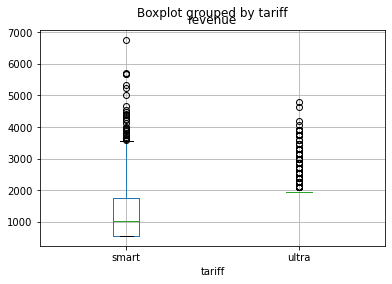

In [54]:
df.boxplot(column='revenue', by='tariff')
plt.show()

Исходя из таблиц и "ящика с усами" можно сказать что, медианное значение выручки от пользователей тарифа `ultra` почти в 2 раза превышает выручку от пользователей тарифа `smart`. Пользователи тарифа `ultra` чаще укладываются в лимиты тарифа, а пользователям тарифа `smart` приходится доплачивать за перерасход.

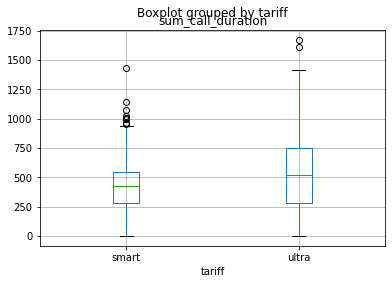

In [55]:
df.boxplot(column='sum_call_duration', by='tariff');

Исходя из таблиц и "ящика с усами" можно сказать что, медианное значение суммы звонков пользователей тарифа `ultra` почти в 6 раз ниже лимита по тарифу.  Почти 40% пользователей тарифа `smart` приходится доплачивать за перерасход по минутам. Пользователи тарифа `ultra` всегда укладываются в лимит тарифа.

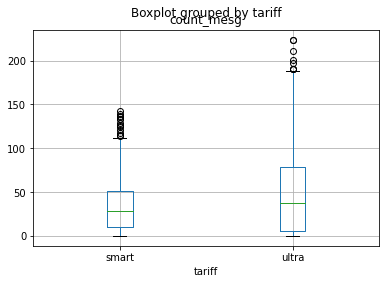

In [56]:
df.boxplot(column='count_mesg', by='tariff');

Исходя из таблиц и "ящика с усами" можно сказать что, пользователи обоих тарифов в среднем укладываются в лимиты по сообщениям. Пользователям тарифа `ultra` всегда укладываются в лимит тарифа. Почти 25% пользователей тарифа `smart` приходится доплачивать за перерасход по сообщениям.

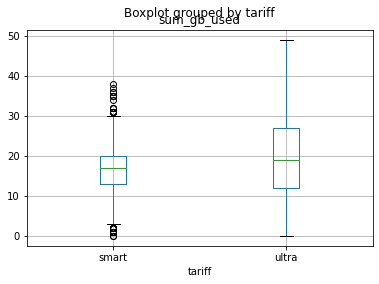

In [57]:
df.boxplot(column='sum_gb_used', by='tariff');

Исходя из таблиц и "ящика с усами" можно сказать что, более 50% пользователей  тарифа `smart` не укладываются в лимиты по трафику. 75% пользователей тарифа `ultra` укладываются в лимит трафика.

### 3.1 Расчет среднего количества, дисперсии и стандартного отклонения

In [58]:
df.pivot_table(index = 'tariff', values = ['sum_call_duration','count_mesg',
                                        'sum_gb_used','revenue'], aggfunc = ['mean','std','median','var']).T

tariff                            smart          ultra
mean   count_mesg             33.384029      49.363452
       revenue              1289.973531    2070.152284
       sum_call_duration     417.934948     526.623350
       sum_gb_used            16.328847      19.494416
std    count_mesg             28.227876      47.804457
       revenue               818.404367     376.187114
       sum_call_duration     190.313730     317.606098
       sum_gb_used             5.747061       9.853511
median count_mesg             28.000000      38.000000
       revenue              1023.000000    1950.000000
       sum_call_duration     422.000000     518.000000
       sum_gb_used            17.000000      19.000000
var    count_mesg            796.812958    2285.266143
       revenue            669785.708006  141516.745079
       sum_call_duration   36219.315784  100873.633397
       sum_gb_used            33.028705      97.091686

Построим сравнительные гистограммы

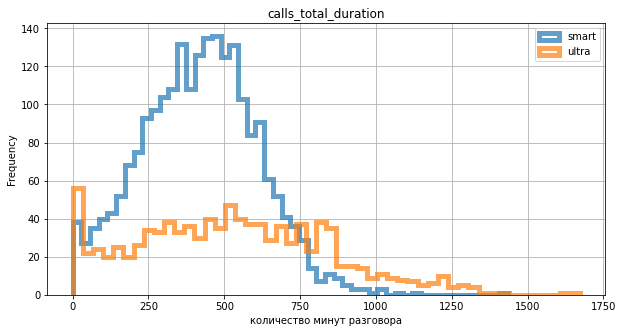

In [59]:
ax=df[df['tariff']=='smart']['sum_call_duration'].plot(kind='hist',
    y='sum_call_duration',
    histtype='step',
    bins=50,
    linewidth=5,
    alpha=0.7,
    figsize = (10,5),                                                   
    label='smart',
)

df[df['tariff']=='ultra']['sum_call_duration'].plot(kind='hist',
    y='sum_call_duration',
    histtype='step',
    bins=50,
    linewidth=5,
    alpha=0.7,
    figsize = (10,5),                                                
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
 )
plt.title('calls_total_duration')
plt.xlabel('количество минут разговора')
plt.legend()
plt.show()

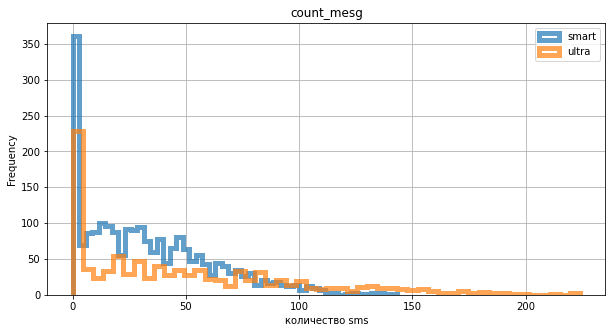

In [60]:
ax=df[df['tariff']=='smart']['count_mesg'].plot(kind='hist',
    y='count_mesg',
    histtype='step',
    bins=50,
    linewidth=5,
    alpha=0.7,
    figsize = (10,5),                                                   
    label='smart',
)

df[df['tariff']=='ultra']['count_mesg'].plot(kind='hist',
    y='count_mesg',
    histtype='step',
    bins=50,
    linewidth=5,
    alpha=0.7,
    figsize = (10,5),                                                
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
 )
plt.title('count_mesg')
plt.xlabel('количество sms')
plt.legend()
plt.show()

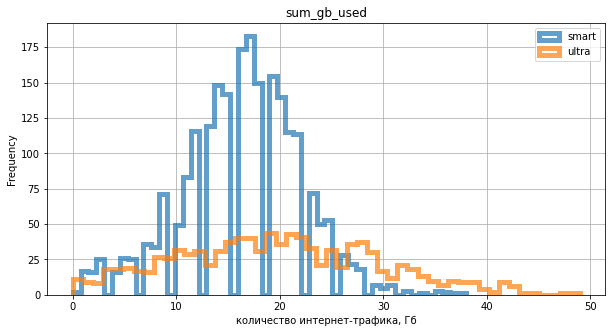

In [61]:
ax=df[df['tariff']=='smart']['sum_gb_used'].plot(kind='hist',
    y='sum_gb_used',
    histtype='step',
    bins=50,
    linewidth=5,
    alpha=0.7,
    figsize = (10,5),                                                   
    label='smart',
)

df[df['tariff']=='ultra']['sum_gb_used'].plot(kind='hist',
    y='sum_gb_used',
    histtype='step',
    bins=50,
    linewidth=5,
    alpha=0.7,
    figsize = (10,5),                                                
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
 )
plt.title('sum_gb_used')
plt.xlabel('количество интернет-трафика, Гб')
plt.legend()
plt.show()

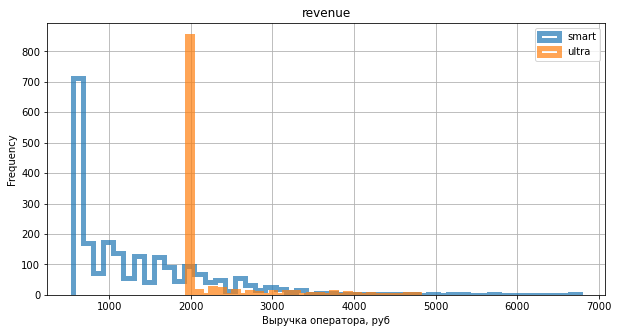

In [62]:
ax=df[df['tariff']=='smart']['revenue'].plot(kind='hist',
    y='revenue',
    histtype='step',
    bins=50,
    linewidth=5,
    alpha=0.7,
    figsize = (10,5),                                                   
    label='smart',
)

df[df['tariff']=='ultra']['revenue'].plot(kind='hist',
    y='revenue',
    histtype='step',
    bins=50,
    linewidth=5,
    alpha=0.7,
    figsize = (10,5),                                                
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
 )
plt.title('revenue')
plt.xlabel('Выручка оператора, руб')
plt.legend()
plt.show()

### 3.2 Вывод

На гистограммах можно заметить, что для тарифа `ultra` гистограммы скошены вправо, а для тарифа `smart` гистограммы скошены влево. Это так же подтверждают данные медианы и среднего, приведенные в сводной таблице. Кроме этого можно заметить, что пользователи тарифа `ultra` не тратят весь базовый пакет минут и количества сообщений, в отличие от тарифа `smart`. <br> 
Пользователи тарифа `ultra` более свободны в выборе того, как именно использовать объемы тарифного пакета: возможно, использование тарифа `ultra` помогает им не думать о том, что в какой-то момент у них отключится интернет или закончится пакет по минутам разговора.

## 4. Проверка гипотез

### 4.1 Гипотеза №1: Средняя выручка от пользователей тарифов "Ультра" и "Смарт" различается.

Сформулируем нулевую и альтернативную гипотезы так:

**H0: средняя выручка от пользователей тарифов «Ультра» и «Смарт» равна**

**H1 : средняя выручка от пользователей тарифов «Ультра» и «Смарт» различается (не равна)**

Проверим размер выборок:

In [63]:
df.groupby('tariff')['revenue'].count()

tariff
smart    2229
ultra     985
Name: revenue, dtype: int64

Размеры выборок отличаются в 2,26 раза и дисперсии сильно отличаются. Поэтому для проверки нулевой гипотезы используем дополнительный параметр `equal_var = False`.

Проверим нулевую гипотезу:

In [64]:
ultra = df[df['tariff']=='ultra']['revenue']
smart = df[df['tariff']=='smart']['revenue']
alpha = .05
results = st.ttest_ind(ultra, smart, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно близка к 0%. Можно с вероятностью 99% сделать вывод, что средняя выручка от пользователей тарифов `ultra` и `smart` различается. 

### 4.2 Гипотеза №2: Средняя выручка от пользователей из Москвы отличается от выручки пользователей из других регионов.

Проверим размер выборок

In [65]:
df[df['city']=='Москва']['revenue'].count()

611

In [66]:
df[df['city']!='Москва']['revenue'].count()

2603

Размеры выборок отличаются в 4,26 раза и, как известно, потребление жителей Москвы сильно отличается от жителей других регионов - есть основания полагать, что разброс будет сильно отличаться. Поэтому для проверки нулевой гипотезы используем дополнительный параметр `equal_var = False`.

Сформулируем нулевую и альтернативную гипотезы так:

**H0: средняя выручка от пользователей из Москвы и из регионов равна**

**H1 : средняя выручка от пользователей из Москвы и из регионов различается (не равна)**

Проверим нулевую гипотезу:

In [67]:
moscow = df[df['city']=='Москва']['revenue']
others = df[df['city']!='Москва']['revenue']
alpha = .05
results_2 = st.ttest_ind(moscow, others, equal_var=False)
print('p-значение:', results_2.pvalue)
if results_2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно почти 53%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между выручками от пользователей из Москвы и из других регионов.

In [68]:
moscow.mean()

1546.7135842880523

In [69]:
others.mean()

1524.9362274298885

### 4.3 Вывод

Были проверены две гипотезы: 1. средняя выручка от пользователей тарифов ultra и smart различается; 2. средняя выручка от пользователей из Москвы  практически не отличается от выручки пользователей из других регионов.

## Общий вывод

**По результатам статистического анализа выручка от тарифа «Ультра» больше, чем от тарифа «Смарт»: в среднем «Мегалайн» от одного пользователя в месяц получает 2070 рублей и 1290 рублей соответственно**<br>
Особенности использования тарифов заключаются в следующем:<br>
1.  Пользователям тарифа «Смарт» не хватает услуг в рамках тарифного пакета: кроме абонентской платы пользователи в среднем доплачивают еще 740 рублей ежемесячно (+134%).<br>
2.  Пользователи тарифа «Ультра», напротив, не используют тарифный пакет в полном объеме.<br>
<br>
Средние доходы от пользователей в Москве не отличаются от доходов в других населенных пунктах: разница статистически незначима (p-значение: 0,526) и составляет 22 руб.: 1547 руб. в Москве против 1525 руб в других населенных пунктах.<br> Пользователи дорогого тарифа более свободны в выборе того, как именно использовать объемы тарифного пакета: возможно, использование дорогого тарифа помогает им не думать о том, что в какой-то момент у них отключится интернет или закончится пакет по минутам разговора.